---
title: "Stroke Prediction Based on Demographics and Medical History"
subtitle: "INFO 511 - Fall 2024 - Final Project"
author: 
  - name: "Coding Wildcats"
    affiliations:
      - name: "School of Information, University of Arizona"
format:
   html:
    code-tools: true
    code-overflow: wrap
    embed-resources: true
editor: visual
execute:
  warning: false
  echo: false
jupyter: python3
---




## Abstract

In this project, we aimed to predict whether a person is at risk of having a stroke using machine learning models. We used a healthcare dataset containing information about individuals (like gender, age, health status, etc.). Our goal was to train multiple machine learning models and evaluate their classification accuracy.

## Introduction


Taking care of one’s health is an important consideration for anyone, but especially young adults who are just starting their own lives. For our project we wanted to do our analysis on data relating to strokes and the risk of strokes. Our models attempt to predict whether a number of factors can be correlated with the risk of strokes. It is important to understand the risk factors of strokes (and other illnesses) because it is much easier to change your lifestyle young but also be aware that family members may be at a high risk of having a stroke and be prepared by knowing the signs of a stroke. This project could help many people, young and old, so they know the risk factors that may contribute to the chance of them having a stroke. 


## Data

The data set we have decided to use is from a study published in China in 2020: Pathan, Muhammad Salman & Zhang, Jianbiao & John, Deepu & Nag, Avishek & Dev, Soumyabrata. (2020). Identifying Stroke Indicators Using Rough Sets. IEEE Access. 8. 10.1109/ACCESS.2020.3039439.
The data from this study was then taken and uploaded on Kaggle, which is where we first found it, though we also went directly to the source to determine validity. Since this data set does deal with patient information there are some ethical considerations, but the study that published this data has de-identified it, removing personal identifiers so the chances of being able to determine the identity of any one individual in this study from this data alone is quite small. 
The data set has 12 columns, with observations including demographic information such as age, gender, marital status, and employment status, as well as medical information such as BMI, glucose levels, smoking history, etc. A glimpse at the dataset can be found below:


In [1]:
#| label: loaddata
#| echo: false
import pandas as pd
stroke = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
print(stroke.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


The dataset includes variables such as gender, smoking status, employment status, and marital status which are qualitative variables. Other variables such as age, BMI, and glucose index are all quantitative.


In [2]:
#| label: loaddata
#| echo: false
import pandas as pd
stroke = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
print(stroke.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


As mentioned this dataset has several demographic variables and then a variable that tracks if that patient had a stroke. From this, we hope to be able to create a model  to predict the possibility of an individual having a stroke based on their demographic information and medical history of an individual. Which is important because identifying key risk factors of a stroke can be used for prevention and more effective monitoring of patients.

Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

This data comes from a study published in China in 2020: Pathan, Muhammad Salman & Zhang, Jianbiao & John, Deepu & Nag, Avishek & Dev, Soumyabrata. (2020). Identifying Stroke Indicators Using Rough Sets. IEEE Access. 8. 10.1109/ACCESS.2020.3039439.\\

## Methodology

The first step of our data cleaning is to evaluate how much of our data is missing. Of 12 variables, only BMI has missing values.


In [3]:
#| label: importpackages
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

<Figure size 960x576 with 0 Axes>

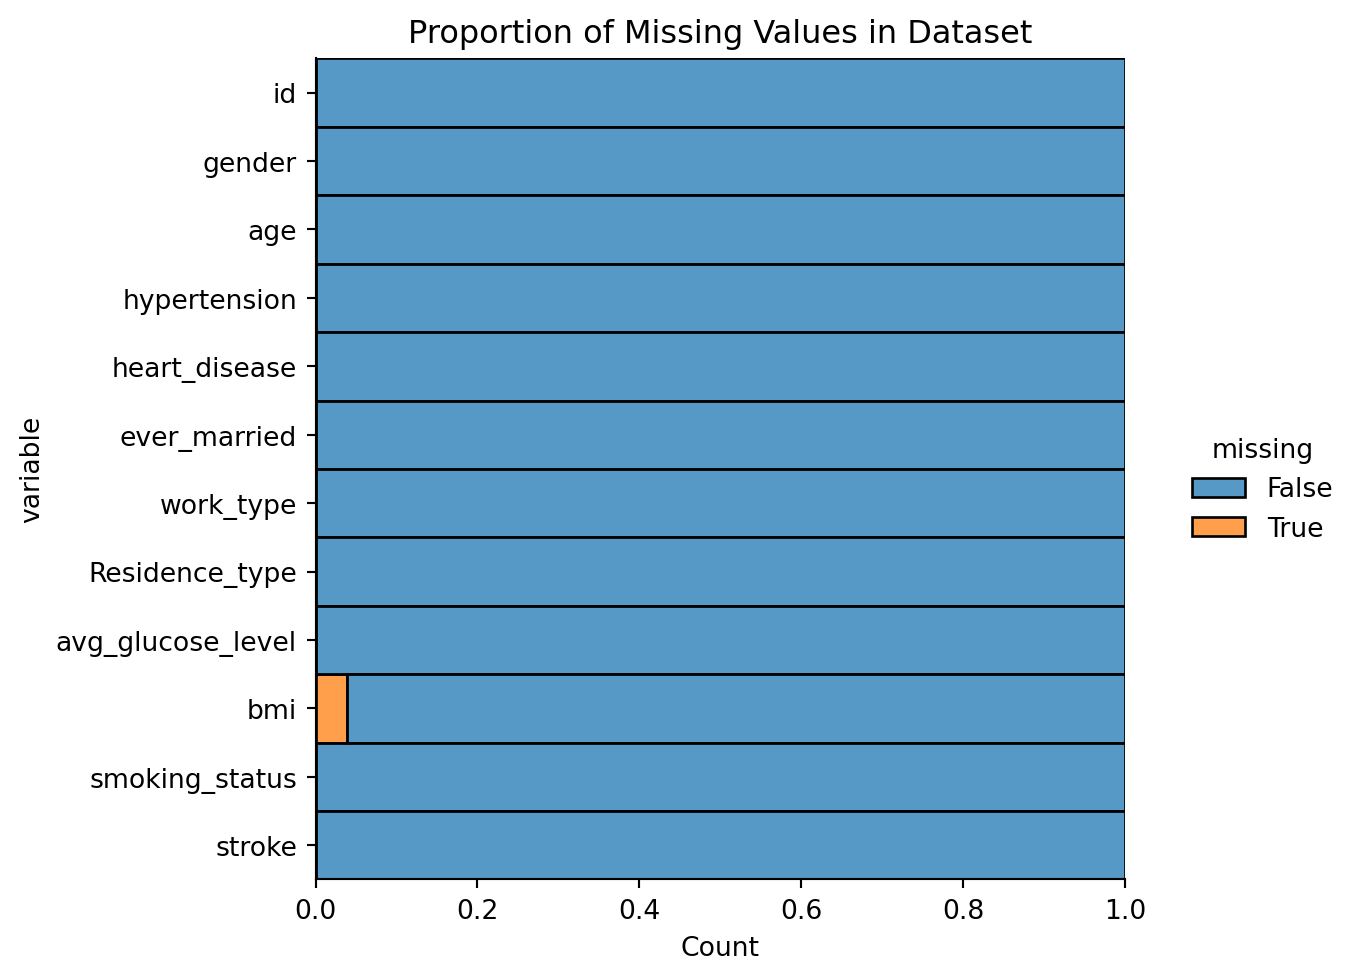

In [4]:
#| label: plotmissing
#| echo: false
plt.figure(figsize=(10,6))
sns.displot(
    data=stroke.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
).set(title='Proportion of Missing Values in Dataset')

In [5]:
#| label: cleandata
#| echo: false
stroke = stroke.dropna()
stroke['gender'] = LabelEncoder().fit_transform(stroke['gender'])
stroke['ever_married'] = LabelEncoder().fit_transform(stroke['ever_married'])
stroke['work_type'] = LabelEncoder().fit_transform(stroke['work_type'])
stroke['Residence_type'] = LabelEncoder().fit_transform(stroke['Residence_type'])
stroke['smoking_status'] = LabelEncoder().fit_transform(stroke['smoking_status'])
stroke.drop(columns=['id'],axis=1,inplace=True) 

Missing values were dropped from the dataset and categorical variables (gender, marital status, work type, residence type and smoking status) were transformed into factors. The correlation matrix of all variables, minus the ID number, is displayed on the heatmap:


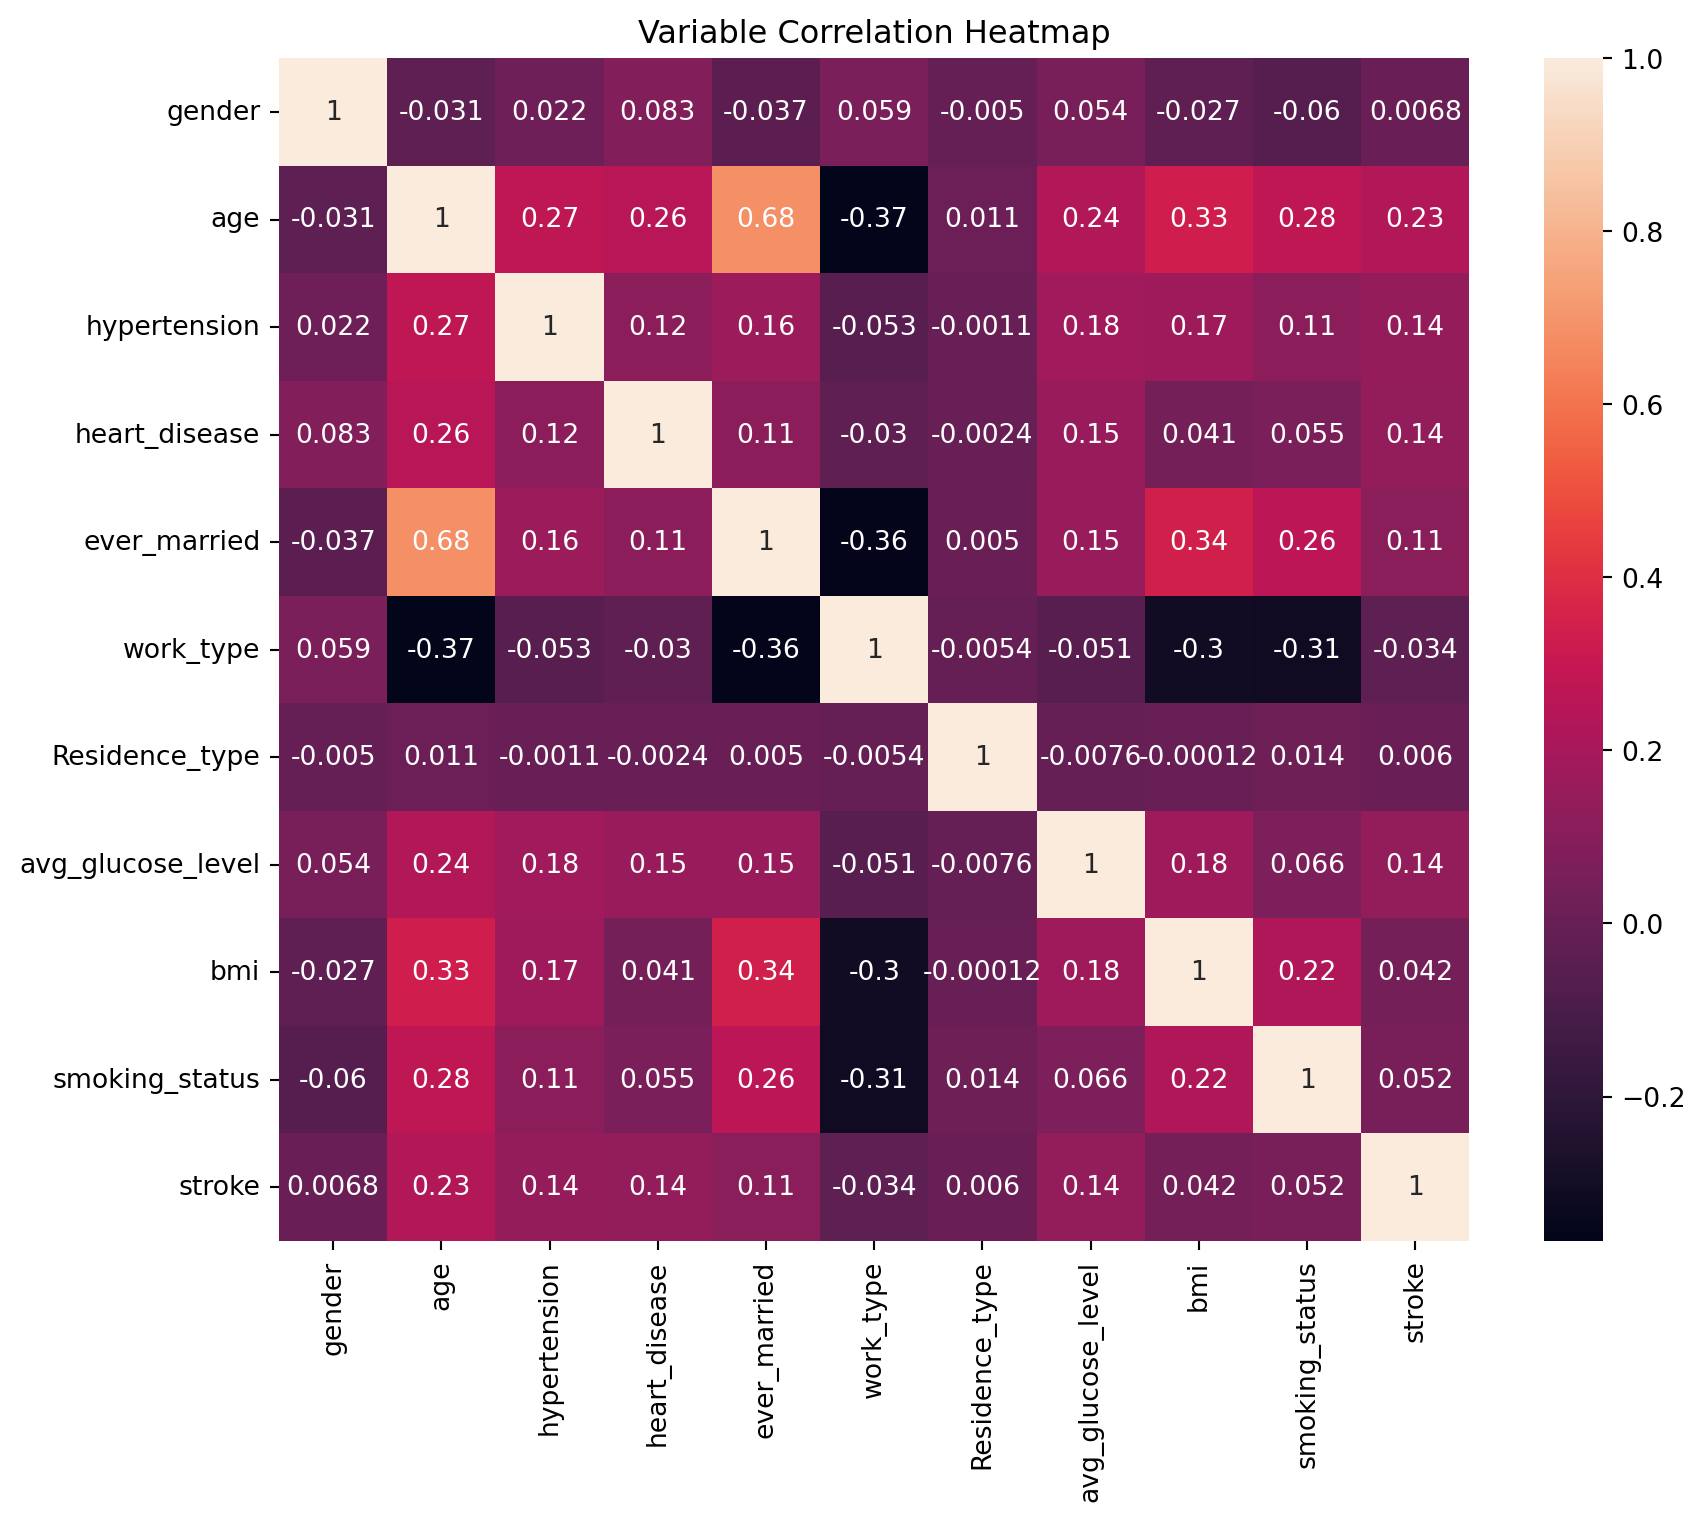

In [6]:
#| label: plotcorrelation
#| echo: false
corr = stroke.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Variable Correlation Heatmap')
plt.show()

After preparing the dataset, we split it into training and testing sets. The training set, which comprises 80% of the data, is used to train our machine learning models, while the testing set, representing 20% of the data, is reserved for final evaluation. This approach ensures that we have unseen data to measure how well the models generalize.

We trained five different machine learning models on this dataset: Random Forest, Decision Tree, Support Vector Machine (SVM), Artificial Neural Network (ANN), and Logistic Regression. Each of these models uses a unique method to identify patterns in the data. The Random Forest model, for instance, builds multiple decision trees and combines their predictions to create a more stable and robust model. The Decision Tree model uses a single tree to make predictions, which is often more prone to overfitting. The Support Vector Machine works by finding the optimal hyperplane that separates classes in the feature space. The Artificial Neural Network mimics how neurons in the human brain process information, making it effective for complex relationships in the data. Finally, Logistic Regression is a linear model that is simple, interpretable, and computationally efficient.

To evaluate the performance of these models, we employed 5-fold cross-validation. This method splits the training data into five equally sized segments (folds). Each model is trained on four of these folds while the fifth fold is used as a validation set. This process is repeated five times, with each fold serving as a validation set once. Cross-validation provides a more reliable estimate of the model's performance because it reduces the likelihood of overfitting to a single train-test split. For each model, we calculated the accuracy for each fold, as well as the average accuracy across all five folds.


In [7]:
#| label: MLmodels
#| warning: false
#| echo: false
# Split the data (20/80)
X = stroke.drop(columns=['stroke'], axis=1) 
Y = stroke['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the ML models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Artificial Neural Network': MLPClassifier(random_state=42, max_iter=500),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42)
}

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the results
results = {'Model': [], 'Fold 1': [], 'Fold 2': [], 'Fold 3': [], 'Fold 4': [], 'Fold 5': [], 'Average Accuracy': []}

# Train each model, calculate cross-validation accuracy
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    avg_accuracy = np.mean(accuracy_scores)
    # Add results to the results dictionary
    results['Model'].append(model_name)
    results['Fold 1'].append(accuracy_scores[0])
    results['Fold 2'].append(accuracy_scores[1])
    results['Fold 3'].append(accuracy_scores[2])
    results['Fold 4'].append(accuracy_scores[3])
    results['Fold 5'].append(accuracy_scores[4])
    results['Average Accuracy'].append(avg_accuracy)

# Display the accuracy results in a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print("\nAccuracy for Each Fold and Average Accuracy for Each Model:")
results_df


Accuracy for Each Fold and Average Accuracy for Each Model:


,Model,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Average Accuracy
0,Random Forest,0.961832,0.949109,0.964331,0.971975,0.955414,0.960532
1,Decision Tree,0.924936,0.913486,0.926115,0.927389,0.918471,0.922079
2,Support Vector Machine,0.963104,0.949109,0.964331,0.970701,0.954140,0.960277
3,Artificial Neural Network,0.963104,0.946565,0.961783,0.970701,0.954140,0.959259
4,Logistic Regression,0.963104,0.949109,0.965605,0.970701,0.954140,0.960532


## Results

The results indicate that the Random Forest model achieved the highest average accuracy at 96.05%, which was matched by Logistic Regression. The Support Vector Machine and Artificial Neural Network followed closely, with average accuracies of 96.03% and 95.93%, respectively. The Decision Tree model had the lowest performance, with an average accuracy of 92.21%. This is not surprising since Decision Trees are known to be sensitive to small changes in the training data, leading to higher variance. On the other hand, Random Forest, which combines multiple Decision Trees, reduces this variance and produces more stable predictions.

The consistency of model performance across the five folds highlights the robustness of the Random Forest, Logistic Regression, and SVM models. Their accuracies for each fold were relatively stable, with small deviations from the average, indicating that these models generalize well to new, unseen data. The Decision Tree model exhibited slightly higher variability across the folds, further supporting the observation that it is less stable than the other models.

In summary, the use of cross-validation allowed us to obtain a more accurate and unbiased assessment of model performance. Among the models, Random Forest and Logistic Regression showed the best overall performance in terms of both average accuracy and stability. Support Vector Machine and Artificial Neural Network also performed well but did not outperform Random Forest or Logistic Regression. The Decision Tree model had the lowest accuracy and was less stable, making it a less desirable choice for this problem. If model simplicity, speed, and interpretability are essential, Logistic Regression is an excellent option. However, if model robustness and predictive power are the priority, Random Forest would be the better choice.

## Discussion

Add discussion here.

## References

Add references here.